In [ ]:
* Diabets.csv데이터를 이용하여 모델을 정의하고 예측하고, Tree그래프를 출력하시오.(Decision Tree)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
diabets = pd.read_csv("Diabetes.csv")
diabets.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] 

x = diabets[col_names].values
y = diabets['Outcome'].values

x.shape, y.shape   # ((768, 8), (768,))
y = y.reshape(-1, 1)
y.shape  # (768, 1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 0)
dtclf = DecisionTreeClassifier()

# 훈련
dtclf.fit(xtrain, ytrain)

# xtest에 대한 예측값을 xResult 에 저장
rResult = dtclf.predict(xtest)
rResult

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

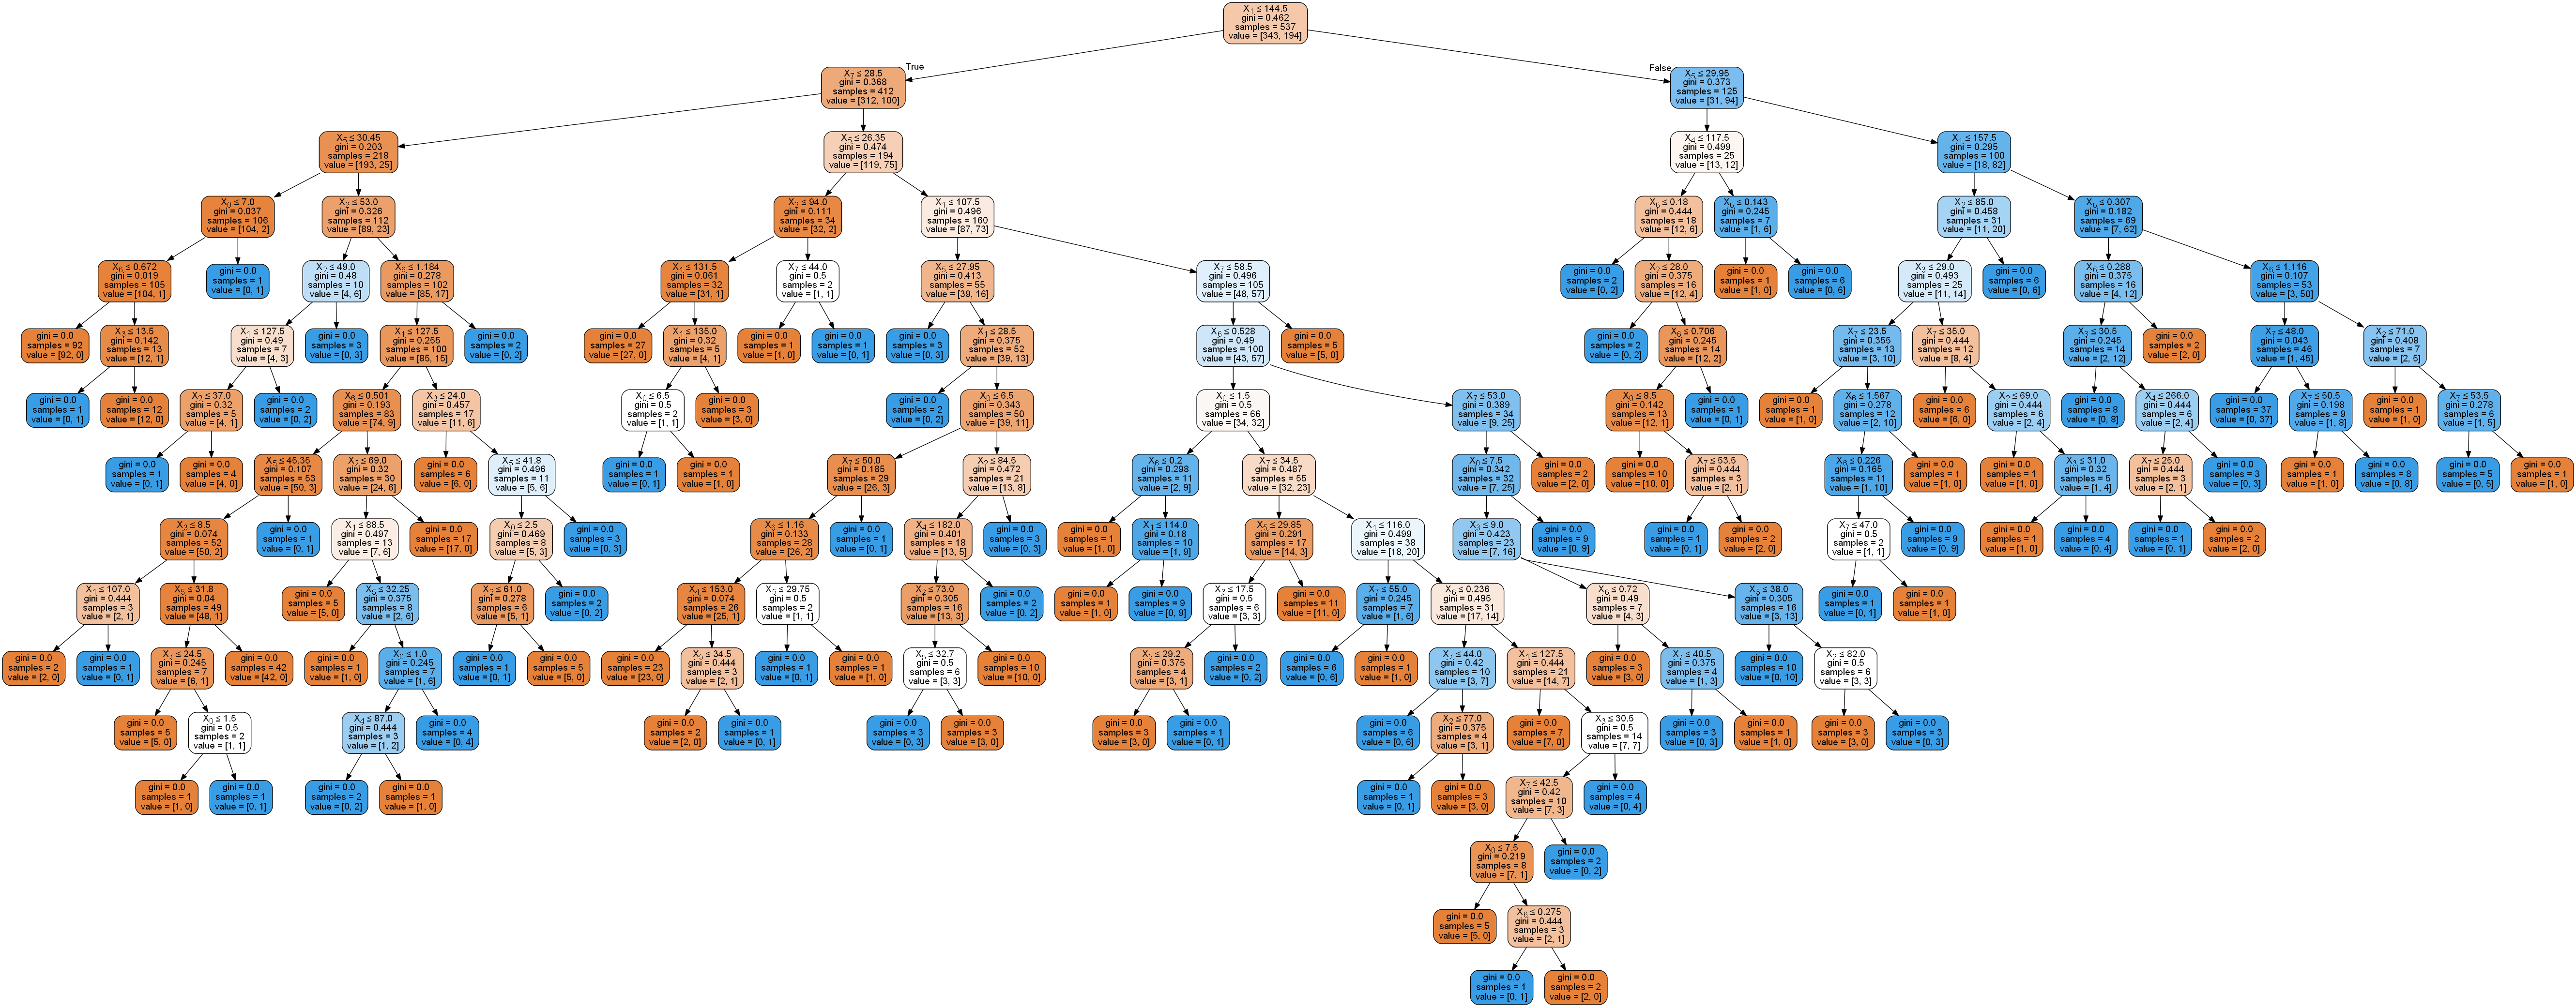

In [15]:
# 훈련된 결정 트리를 시각화하기

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import graphviz
import os

dot_data = StringIO()

os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

export_graphviz(dtclf, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())   # 이미지가 나타남

In [ ]:
* Car.csv데이터를 이용하여 모델을 정의하고 예측하고, Tree그래프를 출력하시오.(Decision Tree)

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
import os

In [32]:
car = pd.read_csv("Car.csv")
car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [33]:
# factorize 를 쓰면 문자들이 0 부터 개수만큼으로 변함 ex) 0 ~ 5 범위로 바뀜

car['class'],_ = pd.factorize(car['class'])
car['buying'],_ = pd.factorize(car['buying'])
car['maint'],_ = pd.factorize(car['maint'])
car['doors'],_ = pd.factorize(car['doors'])
car['persons'],_ = pd.factorize(car['persons'])
car['lug_boot'],_ = pd.factorize(car['lug_boot'])
car['safety'],_ = pd.factorize(car['safety'])

x = car.iloc[:,:-1]
y = car.iloc[:,-1]

x.shape, y.shape  # ((1728, 6), (1728,))

x1 = x.values
y1 = y.values

y1 = y1.reshape(-1, 1)

xtrain, xtest, ytrain, ytest = train_test_split(x1, y1, test_size = 0.3, random_state = 0)

Accuracy_Score :  0.815028901734104


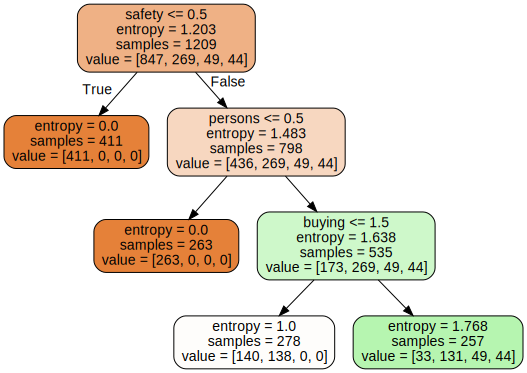

In [39]:
# DecisionTree 생성
dtclf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=0)

dtclf.fit(xtrain, ytrain)

yResult = dtclf.predict(xtest)
yResult
print("Accuracy_Score : ", metrics.accuracy_score(ytest, yResult))

import graphviz
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'
dot_data = tree.export_graphviz(dtclf,
                               out_file=None, filled=True, rounded=True,
                               feature_names=list(car.columns.values[:-1]))
graph = graphviz.Source(dot_data)
graph

In [ ]:
* Diabets.csv데이터를 사용하여 모델을 정의하고 예측하고, Confusion_matrix값을 구하시오.(Logistics regression)

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [47]:
diabets = pd.read_csv("Diabetes.csv")
diabets.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] 

x = diabets[col_names].values
y = diabets['Outcome'].values.reshape(-1, 1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 0)

lr = LogisticRegression()

lr.fit(xtrain, ytrain)

yPrediction = lr.predict(xtest)
yPrediction

cmData = metrics.confusion_matrix(ytest, yPrediction)
print(cmData)

print("Accuracy Score :", metrics.accuracy_score(ytest, yPrediction))
print("Precision Score :", metrics.precision_score(ytest, yPrediction))
print("Recall_Score :", metrics.recall_score(ytest, yPrediction))
print("F1_Score : ", metrics.f1_score(ytest, yPrediction))

[[142  15]
 [ 35  39]]
Accuracy Score : 0.7835497835497836
Precision Score : 0.7222222222222222
Recall_Score : 0.527027027027027
F1_Score :  0.609375


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
* Diabets.csv데이터를 사용하여 여러가지 모델을 정의하고 각각의 모델의 accuacy를 비교하시오.
  Logistic regression, KNeighbors, DecisionTree

In [64]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import pandas as pd
import numpy as np

diabets = pd.read_csv("Diabetes.csv")
x = diabets.iloc[:,:-1]
y = diabets.iloc[:,-1:]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 0)

lr = LogisticRegression()

knn = KNeighborsClassifier()

dt = DecisionTreeClassifier()

classifiers = [('LogisticRegrssion', lr), ('K-NearestNeibors', knn), ('DecisionTree', dt)]

for clf_name, clf in classifiers :
    clf.fit(xtrain, ytrain)
    rResult = clf.predict(xtest)
    accuracy = metrics.accuracy_score(ytest, rResult)
    print(clf_name, "Accuracy_Score : ", accuracy)

LogisticRegrssion Accuracy_Score :  0.7835497835497836
K-NearestNeibors Accuracy_Score :  0.7489177489177489
DecisionTree Accuracy_Score :  0.7186147186147186


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
